In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import mlflow
pd.set_option('display.max_columns', 200)

In [3]:
crdscr = pd.read_csv('credit_score.csv', index_col=0)
crdscr.head(3)

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
1,2,23.000000,13,19114.12,4194.17085,3.0,4.0,3.0,4.0,128,-1,30.923342,1112,4.0,1,809.98,31.944960,0,1,49.574949,118.280222,3,284.629162,2
2,6,34.429817,13,19114.12,4194.17085,3.0,4.0,3.0,4.0,128,3,7.000000,4238,4.0,1,809.98,28.609352,267,1,49.574949,81.699521,4,331.209863,2
3,0,23.000000,13,19114.12,4194.17085,3.0,4.0,3.0,4.0,128,5,4.000000,3764,4.0,1,809.98,31.377862,268,1,49.574949,199.458074,5,223.451310,2


In [4]:
crdscr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79805 entries, 1 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     79805 non-null  int64  
 1   Age                       79805 non-null  float64
 2   Occupation                79805 non-null  int64  
 3   Annual_Income             79805 non-null  float64
 4   Monthly_Inhand_Salary     79805 non-null  float64
 5   Num_Bank_Accounts         79805 non-null  float64
 6   Num_Credit_Card           79805 non-null  float64
 7   Interest_Rate             79805 non-null  float64
 8   Num_of_Loan               79805 non-null  float64
 9   Type_of_Loan              79805 non-null  int64  
 10  Delay_from_due_date       79805 non-null  int64  
 11  Num_of_Delayed_Payment    79805 non-null  float64
 12  Changed_Credit_Limit      79805 non-null  int64  
 13  Num_Credit_Inquiries      79805 non-null  float64
 14  Credit

In [5]:
crdscr.nunique()

Month                           8
Age                            42
Occupation                     16
Annual_Income               13296
Monthly_Inhand_Salary       13183
Num_Bank_Accounts              56
Num_Credit_Card                72
Interest_Rate                  48
Num_of_Loan                    22
Type_of_Loan                 6261
Delay_from_due_date            73
Num_of_Delayed_Payment        585
Changed_Credit_Limit         4239
Num_Credit_Inquiries         1031
Credit_Mix                      3
Outstanding_Debt            12203
Credit_Utilization_Ratio    79805
Credit_History_Age            405
Payment_of_Min_Amount           3
Total_EMI_per_month         14271
Amount_invested_monthly     72603
Payment_Behaviour               7
Monthly_Balance             78835
Credit_Score                    3
dtype: int64

In [6]:
crdscr['Credit_Score'].value_counts()

1    42470
0    23129
2    14206
Name: Credit_Score, dtype: int64

<AxesSubplot: xlabel='Credit_Score', ylabel='count'>

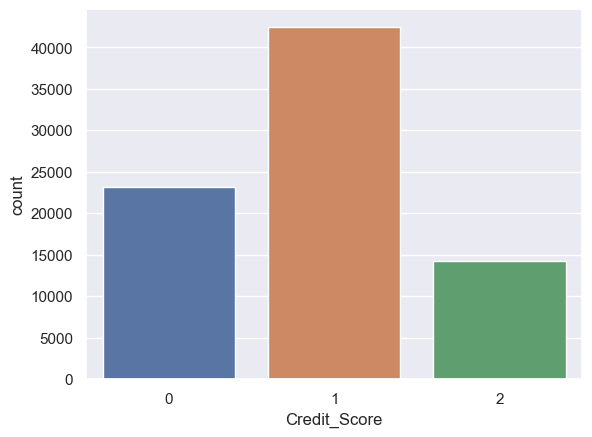

In [102]:
# Dataset is slightly imbalanced
sns.countplot(x=crdscr['Credit_Score'])

In [99]:
# checking Null Vlaue in the Dataset
crdscr.isnull().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [101]:
#Checking Duplicate Values in the Data set
crdscr.duplicated().sum()

0

# Feature Selection Techinques using SelectKBest Class

In [8]:
# Data Spliting for feature selection
X= crdscr.iloc[:,:-1]
y= crdscr.iloc[:,-1]

In [9]:
X_scl= crdscr.iloc[:,:-1]
y_scl= crdscr.iloc[:,-1]

In [10]:
scale = MinMaxScaler()
scale.fit_transform(X_scl,y_scl)

array([[0.28571429, 0.06097561, 0.86666667, ..., 0.01182802, 0.5       ,
        0.17766266],
       [0.85714286, 0.20036362, 0.86666667, ..., 0.00816995, 0.66666667,
        0.20673866],
       [0.        , 0.06097561, 0.86666667, ..., 0.01994581, 0.83333333,
        0.13947502],
       ...,
       [0.71428571, 0.08536585, 0.6       , ..., 0.00240285, 0.        ,
        0.32259098],
       [0.57142857, 0.08536585, 0.6       , ..., 0.02516726, 0.5       ,
        0.19922016],
       [0.14285714, 0.08536585, 0.6       , ..., 0.01671639, 1.        ,
        0.24572902]])

In [11]:
# feature selection using SelecKBest class
best_feat = SelectKBest()
best_feat =best_feat.fit(X,y)
f_select_pvalue = best_feat.pvalues_
f_select = best_feat.scores_

In [12]:
f_pvalue=pd.DataFrame(f_select_pvalue)
f_pvalue

,0
0,1.036432e-01
1,1.519165e-257
2,1.670719e-02
3,1.036310e-02
4,0.000000e+00
5,0.000000e+00
6,0.000000e+00
7,0.000000e+00
8,0.000000e+00
9,3.705638e-111


In [13]:
feat_name = pd.DataFrame(X.columns,columns=['Feature_name'])

In [14]:
#making and Concotenating dataframe of Highly Correlated Feature Scoresa and PValue
f_select = pd.DataFrame(f_select,columns=['Scores'])
top_feature = pd.concat((feat_name,f_select),axis=1)
top_feature=pd.concat((top_feature, f_pvalue), axis=1)
top_feature.rename(columns={'Feature_name':'feat_name','Scores':'scores',0:'p_value'}, inplace =True)
top_feature

,feat_name,scores,p_value
0,Month,2.266866,1.036432e-01
1,Age,595.749911,1.519165e-257
2,Occupation,4.092126,1.670719e-02
3,Annual_Income,4.569765,1.036310e-02
4,Monthly_Inhand_Salary,1527.148658,0.000000e+00
5,Num_Bank_Accounts,5259.362399,0.000000e+00
6,Num_Credit_Card,3204.957730,0.000000e+00
7,Interest_Rate,11737.925553,0.000000e+00
8,Num_of_Loan,5386.965164,0.000000e+00
9,Type_of_Loan,255.089030,3.705638e-111


In [15]:
top_feature.sort_values(by='scores',ascending=False)

,feat_name,scores,p_value
7,Interest_Rate,11737.925553,0.000000e+00
10,Delay_from_due_date,9201.746078,0.000000e+00
15,Outstanding_Debt,7224.643512,0.000000e+00
8,Num_of_Loan,5386.965164,0.000000e+00
5,Num_Bank_Accounts,5259.362399,0.000000e+00
14,Credit_Mix,4937.233595,0.000000e+00
17,Credit_History_Age,4254.765443,0.000000e+00
18,Payment_of_Min_Amount,3907.855159,0.000000e+00
6,Num_Credit_Card,3204.957730,0.000000e+00
22,Monthly_Balance,1712.385115,0.000000e+00


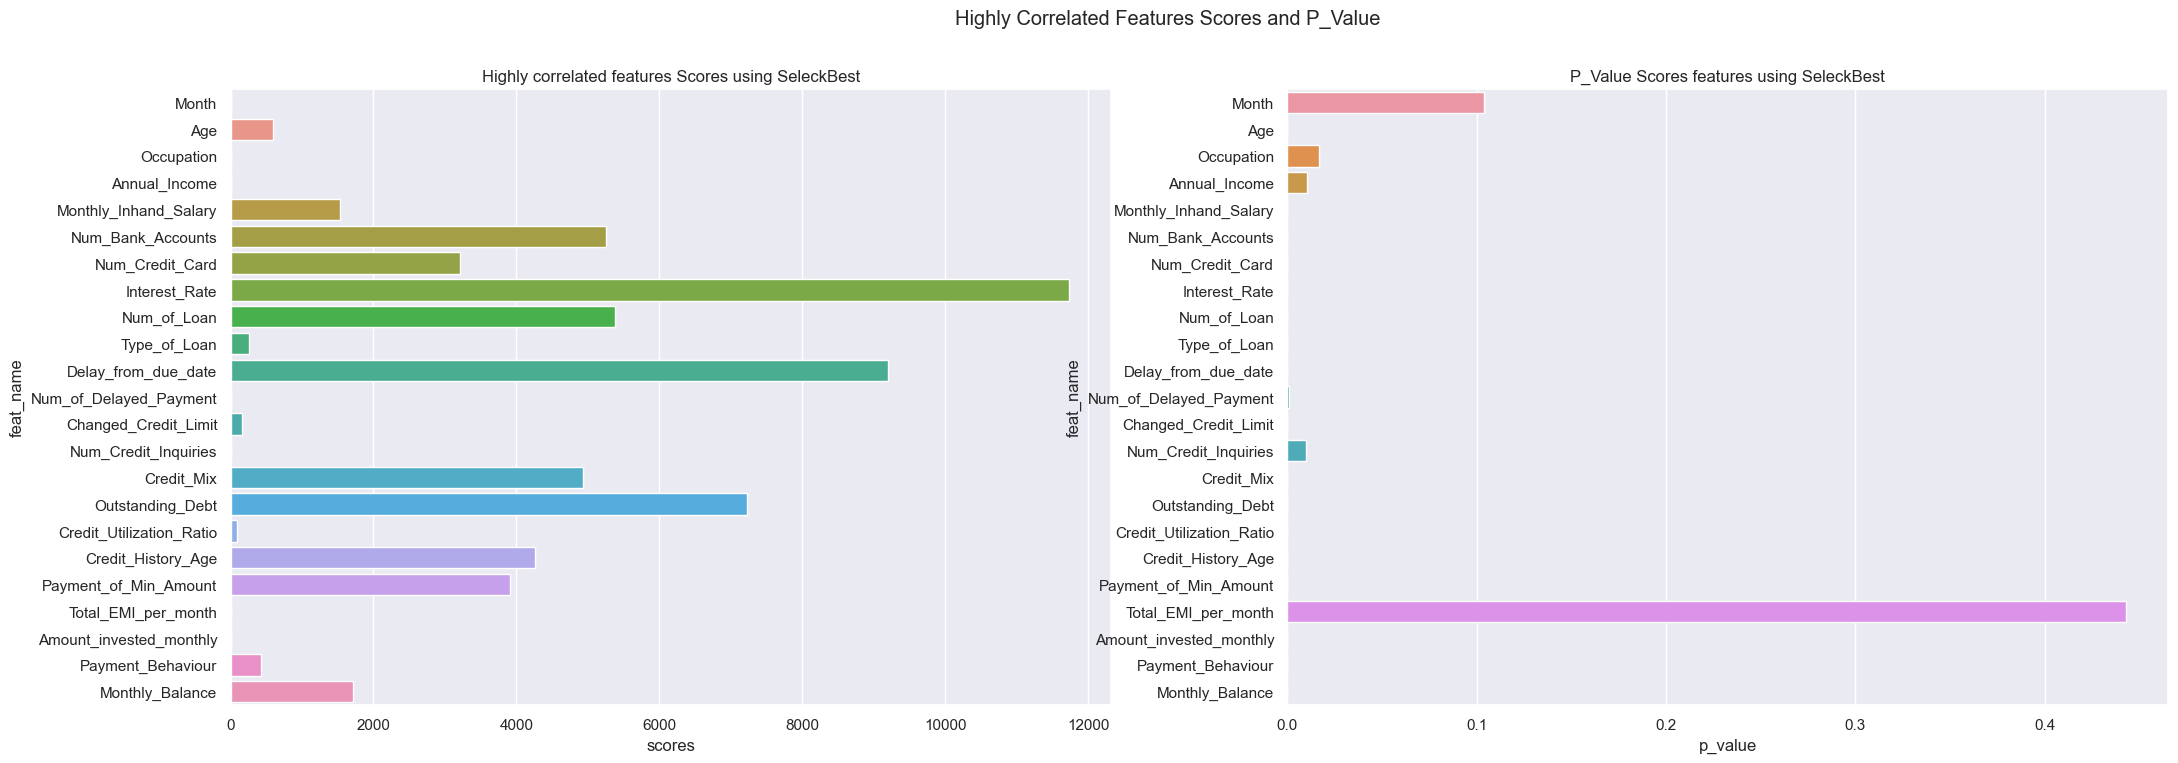

In [16]:
#Correlated and Features Scores and PValue for Feature Selection
sns.set_theme()
fig, axes = plt.subplots(1,2,figsize=(25,8))
fig.set_figheight(8)
fig.set_figwidth(25)
fig.suptitle('Highly Correlated Features Scores and P_Value')
sns.barplot(ax=axes[0],x='scores', y='feat_name', data=top_feature).set(title="Highly correlated features Scores using SeleckBest")
sns.barplot(ax=axes[1],x='p_value', y='feat_name', data=top_feature).set(title="P_Value Scores features using SeleckBest")
plt.show()

Finding correlation Features using Pearson correlation

In [17]:
#Correlation features used Corr Function
crdscr_corr_df = crdscr.corr()
crdscr_corr_df

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
Month,1.000000,-0.000156,-0.001634,0.004526,0.003551,-0.000529,-0.002818,-0.002696,-0.001086,-0.001145,0.000321,0.001138,0.001931,-0.002782,0.003677,-0.001818,0.000296,0.002283,-0.002666,-0.000761,0.002960,0.000332,-0.001971,-0.003531
Age,-0.000156,1.000000,-0.003459,0.005567,0.056657,-0.128597,-0.076729,-0.160018,-0.152913,0.041727,-0.128748,0.000444,0.021967,-0.003136,0.061249,-0.157775,0.015393,0.139841,-0.116499,0.003139,-0.000503,-0.022761,0.080158,0.120665
Occupation,-0.001634,-0.003459,1.000000,-0.002681,-0.001576,0.011664,0.009205,0.004944,-0.007599,-0.002792,0.007367,0.001498,0.001623,-0.001864,0.004842,0.005515,0.002326,-0.003979,-0.001277,0.001180,0.002148,0.006000,-0.003044,-0.009254
Annual_Income,0.004526,0.005567,-0.002681,1.000000,0.030368,-0.002306,-0.000011,-0.007989,-0.006487,0.003726,-0.010220,0.000110,0.002964,0.006504,-0.006552,-0.004926,0.008728,-0.002618,-0.003937,0.001883,-0.003966,-0.009430,0.021822,0.009235
Monthly_Inhand_Salary,0.003551,0.056657,-0.001576,0.030368,1.000000,-0.226484,-0.131805,-0.274044,-0.228295,0.060771,-0.230136,0.001432,0.006406,-0.006517,0.089266,-0.251399,0.158472,0.203947,-0.181512,0.005215,0.054015,-0.241830,0.639199,0.190898
Num_Bank_Accounts,-0.000529,-0.128597,0.011664,-0.002306,-0.226484,1.000000,0.257766,0.497456,0.390605,-0.082024,0.482987,0.009941,-0.020265,0.008808,-0.195652,0.437895,-0.059864,-0.330971,0.314302,-0.004264,-0.016422,0.078130,-0.254995,-0.335187
Num_Credit_Card,-0.002818,-0.076729,0.009205,-0.000011,-0.131805,0.257766,1.000000,0.327947,0.270014,-0.052301,0.323459,0.004867,-0.013180,0.012274,-0.224344,0.327839,-0.036680,-0.222309,0.169336,-0.004516,-0.010223,0.041398,-0.154787,-0.272623
Interest_Rate,-0.002696,-0.160018,0.004944,-0.007989,-0.274044,0.497456,0.327947,1.000000,0.531305,-0.112528,0.579506,0.012382,-0.029430,0.015226,-0.316152,0.619660,-0.076226,-0.452304,0.384581,-0.002787,-0.018550,0.088794,-0.319556,-0.476649
Num_of_Loan,-0.001086,-0.152913,-0.007599,-0.006487,-0.228295,0.390605,0.270014,0.531305,1.000000,-0.249934,0.484691,0.012868,-0.018223,0.013080,-0.428045,0.616663,-0.096589,-0.461528,0.312468,-0.001445,-0.015486,0.075847,-0.416317,-0.343396
Type_of_Loan,-0.001145,0.041727,-0.002792,0.003726,0.060771,-0.082024,-0.052301,-0.112528,-0.249934,1.000000,-0.099375,-0.012284,0.020877,0.000531,0.052926,-0.112247,0.033443,0.098743,-0.075671,0.000636,-0.001280,-0.019313,0.134497,0.079691


In [18]:
# Making Correlated Matrix as Dataframe
crdscr_corr_df = crdscr_corr_df.reset_index(drop=True)
crdscr_corr_df

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1.000000,-0.000156,-0.001634,0.004526,0.003551,-0.000529,-0.002818,-0.002696,-0.001086,-0.001145,0.000321,0.001138,0.001931,-0.002782,0.003677,-0.001818,0.000296,0.002283,-0.002666,-0.000761,0.002960,0.000332,-0.001971,-0.003531
1,-0.000156,1.000000,-0.003459,0.005567,0.056657,-0.128597,-0.076729,-0.160018,-0.152913,0.041727,-0.128748,0.000444,0.021967,-0.003136,0.061249,-0.157775,0.015393,0.139841,-0.116499,0.003139,-0.000503,-0.022761,0.080158,0.120665
2,-0.001634,-0.003459,1.000000,-0.002681,-0.001576,0.011664,0.009205,0.004944,-0.007599,-0.002792,0.007367,0.001498,0.001623,-0.001864,0.004842,0.005515,0.002326,-0.003979,-0.001277,0.001180,0.002148,0.006000,-0.003044,-0.009254
3,0.004526,0.005567,-0.002681,1.000000,0.030368,-0.002306,-0.000011,-0.007989,-0.006487,0.003726,-0.010220,0.000110,0.002964,0.006504,-0.006552,-0.004926,0.008728,-0.002618,-0.003937,0.001883,-0.003966,-0.009430,0.021822,0.009235
4,0.003551,0.056657,-0.001576,0.030368,1.000000,-0.226484,-0.131805,-0.274044,-0.228295,0.060771,-0.230136,0.001432,0.006406,-0.006517,0.089266,-0.251399,0.158472,0.203947,-0.181512,0.005215,0.054015,-0.241830,0.639199,0.190898
5,-0.000529,-0.128597,0.011664,-0.002306,-0.226484,1.000000,0.257766,0.497456,0.390605,-0.082024,0.482987,0.009941,-0.020265,0.008808,-0.195652,0.437895,-0.059864,-0.330971,0.314302,-0.004264,-0.016422,0.078130,-0.254995,-0.335187
6,-0.002818,-0.076729,0.009205,-0.000011,-0.131805,0.257766,1.000000,0.327947,0.270014,-0.052301,0.323459,0.004867,-0.013180,0.012274,-0.224344,0.327839,-0.036680,-0.222309,0.169336,-0.004516,-0.010223,0.041398,-0.154787,-0.272623
7,-0.002696,-0.160018,0.004944,-0.007989,-0.274044,0.497456,0.327947,1.000000,0.531305,-0.112528,0.579506,0.012382,-0.029430,0.015226,-0.316152,0.619660,-0.076226,-0.452304,0.384581,-0.002787,-0.018550,0.088794,-0.319556,-0.476649
8,-0.001086,-0.152913,-0.007599,-0.006487,-0.228295,0.390605,0.270014,0.531305,1.000000,-0.249934,0.484691,0.012868,-0.018223,0.013080,-0.428045,0.616663,-0.096589,-0.461528,0.312468,-0.001445,-0.015486,0.075847,-0.416317,-0.343396
9,-0.001145,0.041727,-0.002792,0.003726,0.060771,-0.082024,-0.052301,-0.112528,-0.249934,1.000000,-0.099375,-0.012284,0.020877,0.000531,0.052926,-0.112247,0.033443,0.098743,-0.075671,0.000636,-0.001280,-0.019313,0.134497,0.079691


<AxesSubplot: >

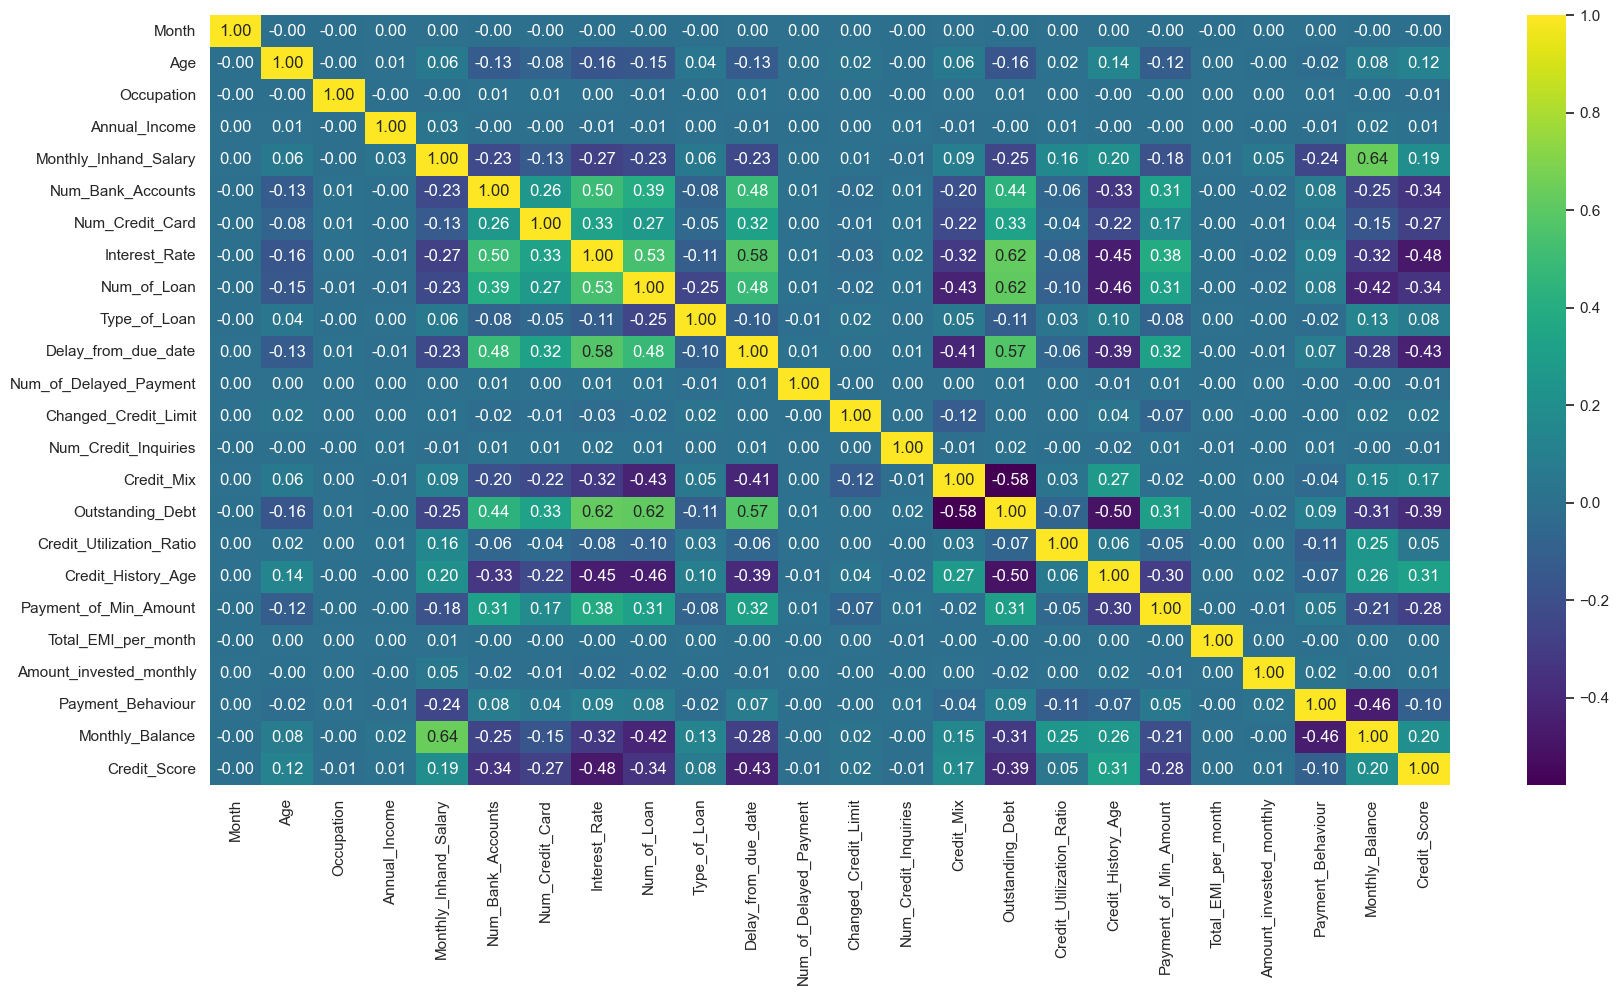

In [ ]:
#Heat Map of Correlation matrix
plt.figure(figsize=(20,10))
sns.heatmap(crdscr.corr(), annot=True,cmap='viridis',fmt=".2f")

In [ ]:
# Checking contanst Variable using Varaince Threshold for Feature Selection.
selector = VarianceThreshold(threshold=0)
selector.fit(X)
selector.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

C:\Users\cathrine\AppData\Local\Temp\ipykernel_4508\1954964178.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crdscr['Annual_Income'], ax=ax[0],color='r')
C:\Users\cathrine\AppData\Local\Temp\ipykernel_4508\1954964178.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crdscr['Age'], ax=ax[

<AxesSubplot: xlabel='Payment_Behaviour', ylabel='Density'>

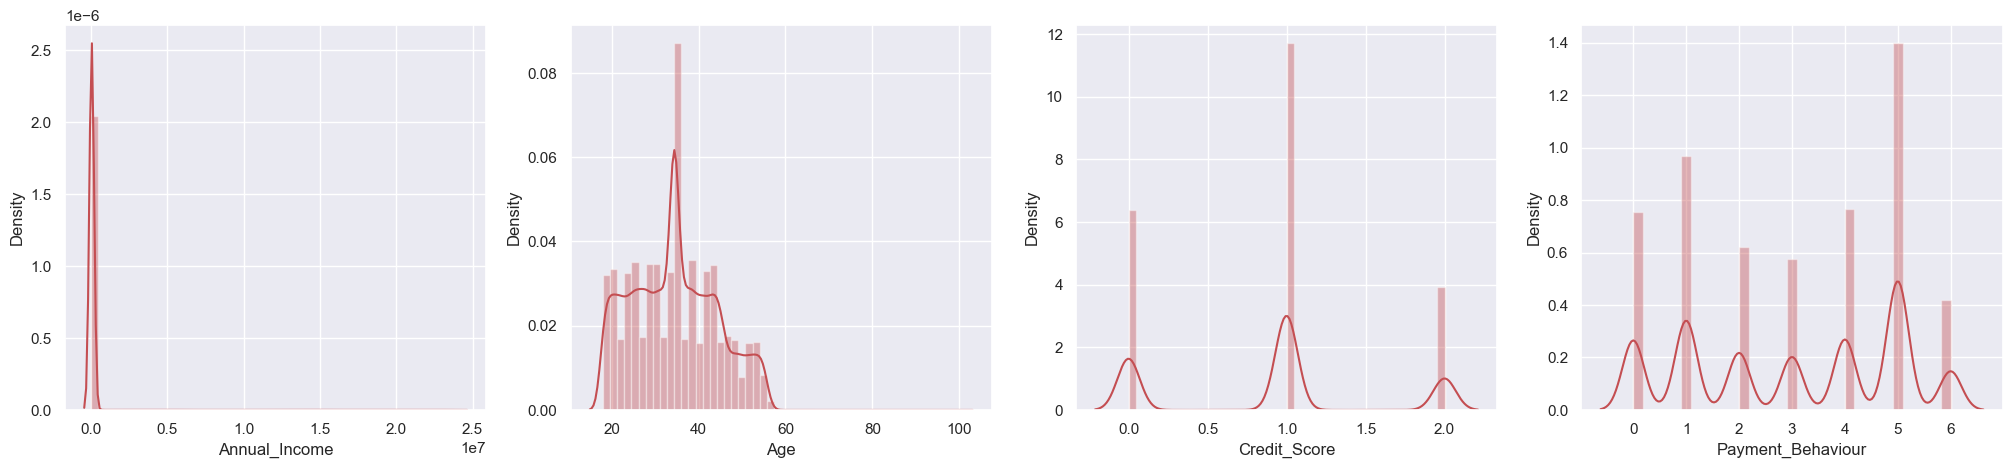

In [ ]:
#Distiribution plts of some important feature
sns.set_theme()
fig,ax = plt.subplots(1,4, figsize=(25,5))
sns.distplot(crdscr['Annual_Income'], ax=ax[0],color='r')
sns.distplot(crdscr['Age'], ax=ax[1],color='r')
sns.distplot(crdscr['Credit_Score'], ax=ax[2],color='r')
sns.distplot(crdscr['Payment_Behaviour'], ax=ax[3],color='r')

In [ ]:
crdscr.columns

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

Text(0.5, 1.0, 'CreditScore Vs Amount Invested Monthly')

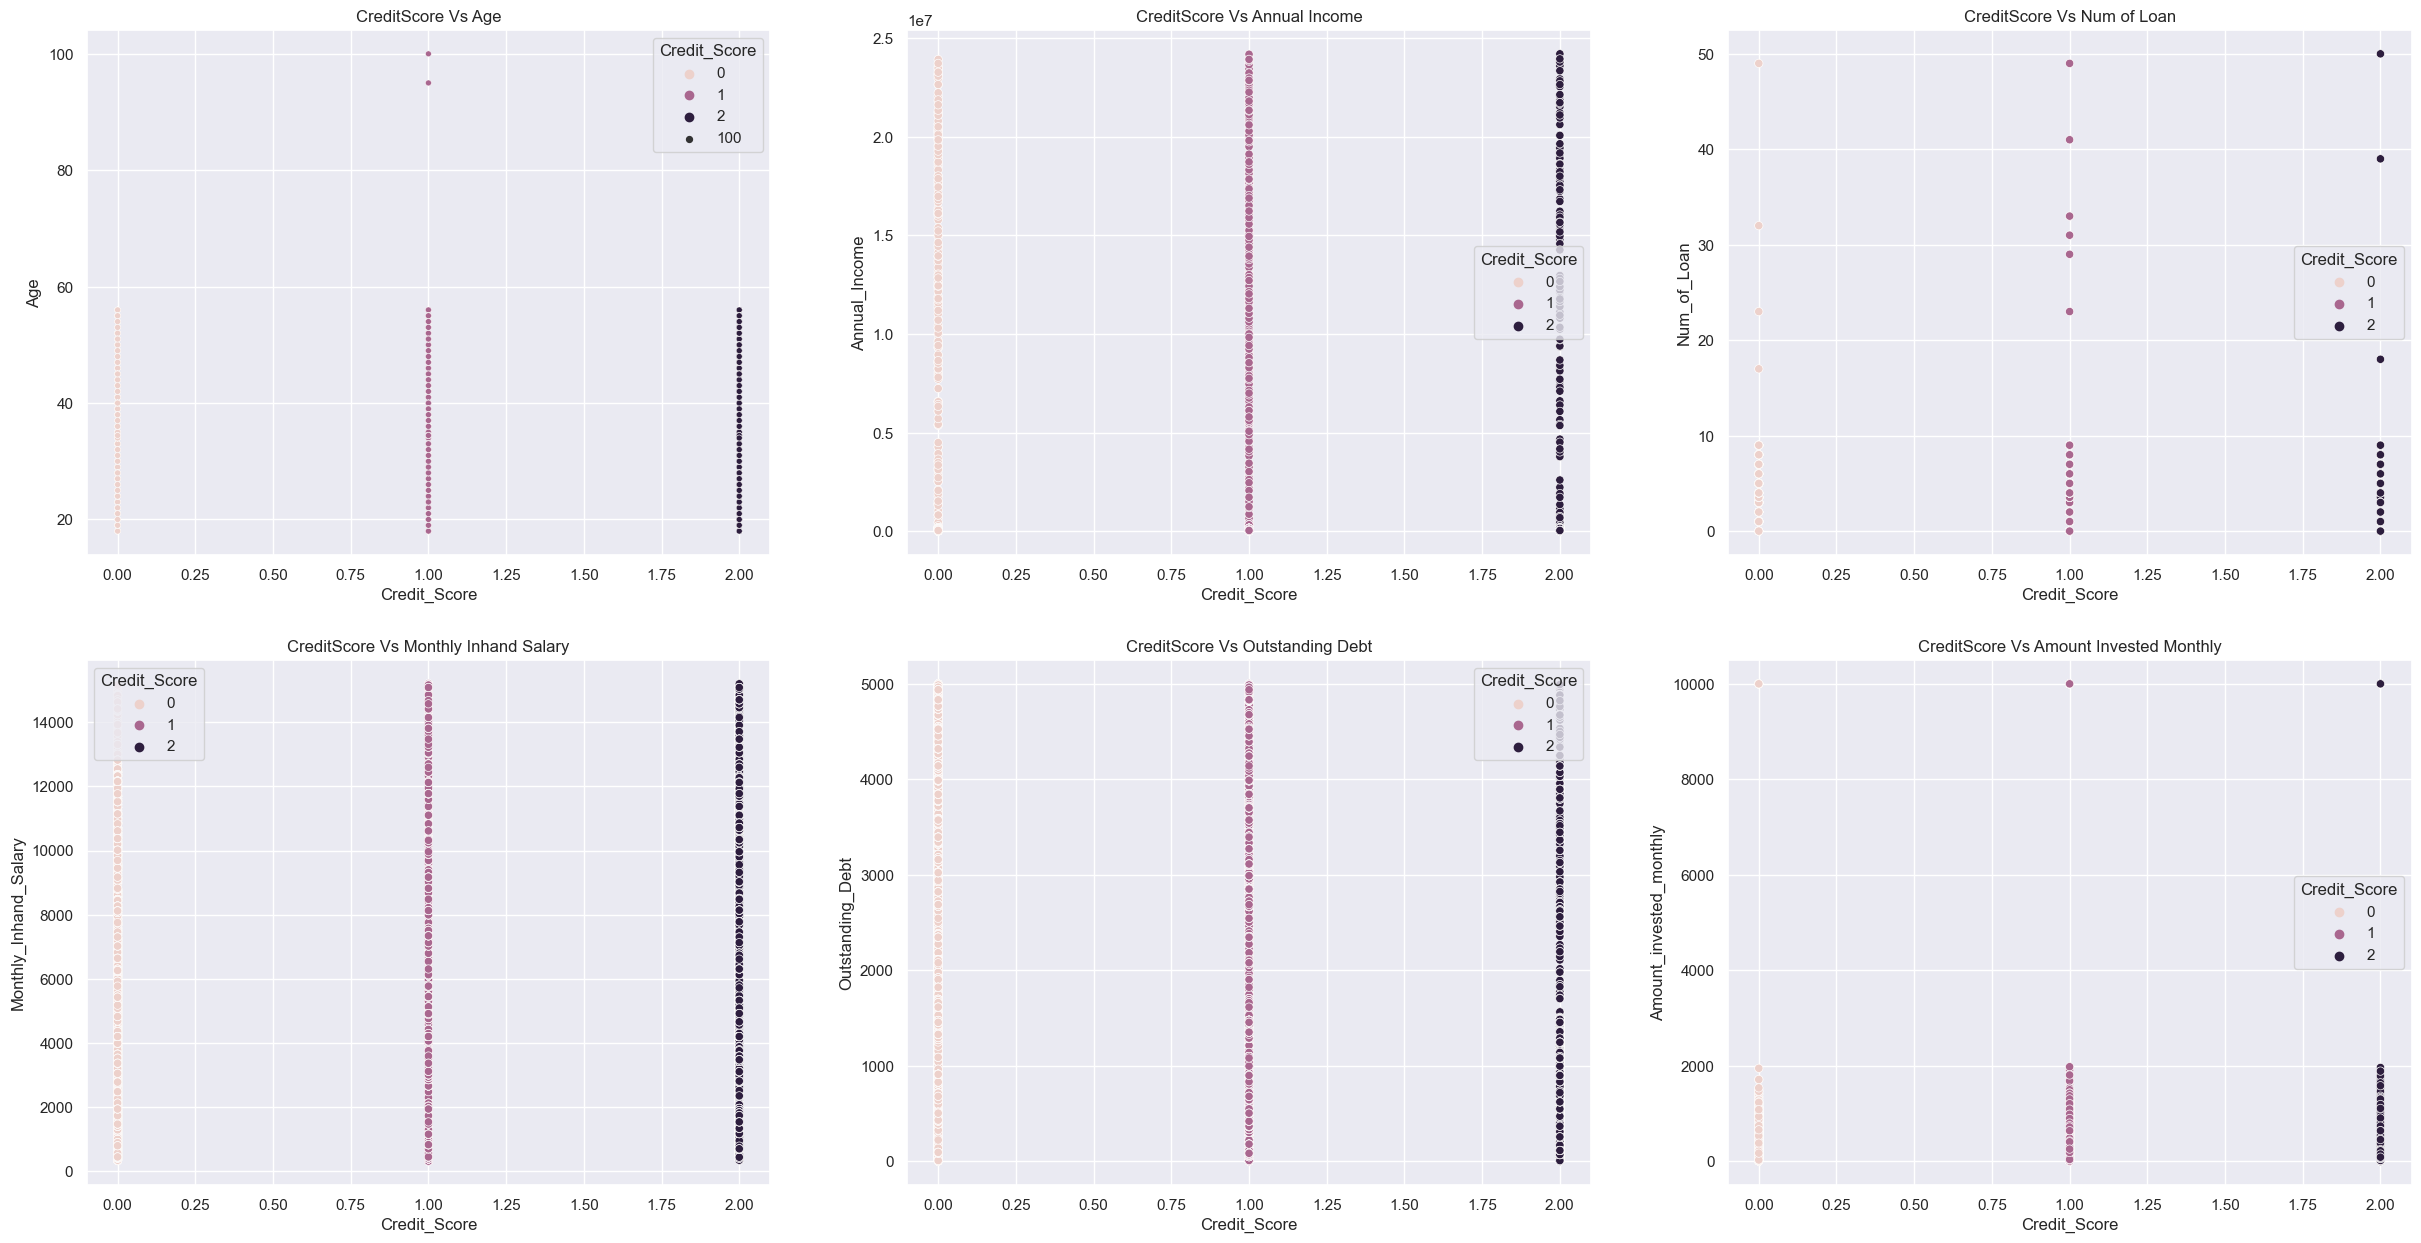

In [85]:
# Credit Score correlatioship interms of CustomersAge, Annual Income, payment Behaviour, Monthly Inhand Salary, Amount Invested monthly 
fig, ax = plt.subplots(2,3, figsize=(30,15))
sns.scatterplot(data=crdscr, x=crdscr['Credit_Score'], y=crdscr['Age'], size=100, hue='Credit_Score', ax=ax[0][0]).set_title('CreditScore Vs Age')
sns.scatterplot(data=crdscr, x=crdscr['Credit_Score'], y=crdscr['Annual_Income'],hue='Credit_Score', ax=ax[0][1]).set_title('CreditScore Vs Annual Income')
sns.scatterplot(data=crdscr, x=crdscr['Credit_Score'], y=crdscr['Num_of_Loan'],hue='Credit_Score', ax=ax[0][2]).set_title('CreditScore Vs Num of Loan')
sns.scatterplot(data=crdscr, x=crdscr['Credit_Score'], y=crdscr['Monthly_Inhand_Salary'],hue='Credit_Score', ax=ax[1][0]).set_title('CreditScore Vs Monthly Inhand Salary')
sns.scatterplot(data=crdscr, x=crdscr['Credit_Score'], y=crdscr['Outstanding_Debt'],hue='Credit_Score',ax=ax[1][1]).set_title('CreditScore Vs Outstanding Debt')
sns.scatterplot(data=crdscr, x=crdscr['Credit_Score'], y=crdscr['Amount_invested_monthly'],hue='Credit_Score', ax=ax[1][2]).set_title('CreditScore Vs Amount Invested Monthly')

# TRAINING AND TEST DATA SPLIT

In [91]:
# Train and Test Data Splitting for model training
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [93]:
print(X_train.shape)
print(y_train.shape)

(55863, 23)
(55863,)


In [94]:
X_train.head(3)

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
76400,3,34.0,14,15093.63,1479.802500,10.000000,10.0,26.0,7.0,2627,48,20.0,1807,12.0,0,2684.55,39.708019,118,2,54.673877,637.412998,2,290.327166
72602,6,45.0,3,101607.27,8655.272500,5.402566,5.0,10.0,4.0,6173,7,2.0,697,3.0,1,1042.82,34.223848,375,1,228.382711,128.435662,6,748.708877
32312,3,32.0,9,17455.36,1222.613333,7.000000,10.0,21.0,7.0,2253,52,18.0,877,12.0,0,1657.79,28.921770,115,2,58.796221,83.863326,6,269.601786


In [95]:
y_train.head(3)

76400    1
72602    2
32312    0
Name: Credit_Score, dtype: int64

<AxesSubplot: xlabel='Credit_Score', ylabel='count'>

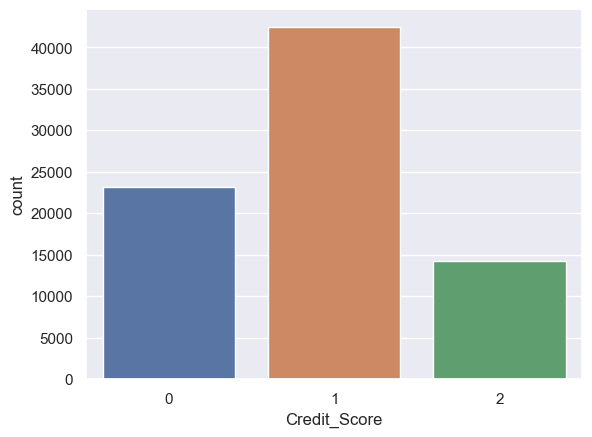

In [97]:
# Dataset is sligthly imbalanced
sns.countplot(data=crdscr, x="Credit_Score")

In [108]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

Before OverSampling, counts of label '1': 29739
Before OverSampling, counts of label '0': 16137 



# Applying SMOTE for balancing the dataset

In [110]:
# SMOTE Objet creation
sm = SMOTE(random_state=2)
X_train_rsamp,y_train_rsamp = sm.fit_resample(X_train, y_train)

In [113]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_rsamp.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_rsamp.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_rsamp == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_rsamp == 0)))

After OverSampling, the shape of train_X: (89217, 23)
After OverSampling, the shape of train_y: (89217,) 

After OverSampling, counts of label '1': 29739
After OverSampling, counts of label '0': 29739


# Model Building Process

In [119]:
# Algorith Selection for model training
model_lr_crdscr = LogisticRegression()
model_dt_crdscr = DecisionTreeClassifier()
model_rf_crdscr = RandomForestClassifier()
model_xgb_crdscr = XGBClassifier()

# MLFLOW EXPERIMENT SETUP

In [122]:
# Creating MLFLow Experiment setup
mlflow.set_experiment("Credit Score Experiment")
mlflow.sklearn.autolog()

In [123]:
#mlflow Experiment - Logistic Regression
with mlflow.start_run(run_name="Logistic regression") as run:
    model_lr_crdscr.fit(X_train_rsamp,y_train_rsamp)
    predslr = model_lr_crdscr.predict(X_test)

c:\mob\mob\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
2023/01/05 07:50:40 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\mob\mob\lib\site-packages\mlflow\models\signature.py:130: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a reali

In [125]:
print("Logistic Regression with balanced Dataset :")
print("Model Score on Training data :",model_lr_crdscr.score(X_train_rsamp, y_train_rsamp))
print("Model Score on Test Data: ", model_lr_crdscr.score(X_test, y_test))

Logistic Regression with balanced Dataset :
Model Score on Training data : 0.4899178407702568
Model Score on Test Data:  0.40698354356361205


In [126]:
# Experiment using Descion Tree Classifier
with mlflow.start_run(run_name="Decision Tree classiifer") as run:
    model_dt_crdscr.fit(X_train_rsamp,y_train_rsamp)
    predslr = model_dt_crdscr.predict(X_test)

2023/01/05 07:54:56 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\mob\mob\lib\site-packages\mlflow\models\signature.py:130: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."


In [128]:
print("Decision Tree Classifier with balanced Dataset, The training and test score :")
print("Model Score on Training data :",model_dt_crdscr.score(X_train_rsamp, y_train_rsamp))
print("Model Score on Test Data: ", model_dt_crdscr.score(X_test, y_test))

Decision Tree Classifier with balanced Dataset, The training and test score :
Model Score on Training data : 1.0
Model Score on Test Data:  0.676050455266895


In [129]:
# Experiment using Ensemble Technique of Random Forest Classifier
with mlflow.start_run(run_name="Random Forest Classifier") as run:
    model_rf_crdscr.fit(X_train_rsamp,y_train_rsamp)
    predslr = model_rf_crdscr.predict(X_test)

2023/01/05 07:58:58 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\mob\mob\lib\site-packages\mlflow\models\signature.py:130: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."


In [131]:
print("Ranodm Forest classifier with balanced Dataset :")
print("Model Score on Training data :",model_rf_crdscr.score(X_train_rsamp, y_train_rsamp))
print("Model Score on Test Data: ", model_rf_crdscr.score(X_test, y_test))

Ranodm Forest classifier with balanced Dataset :
Model Score on Training data : 1.0
Model Score on Test Data:  0.7681897919973268


In [134]:
# Experiment using Ensemble Technique of XGBoost Classifier
with mlflow.start_run(run_name="XGBooost Classifier") as run:
    model_xgb_crdscr.fit(X_train_rsamp,y_train_rsamp)
    predslr = model_xgb_crdscr.predict(X_test)

In [133]:
print("XGBooost classifier with balanced Dataset :")
print("Model Score on Training data :",model_xgb_crdscr.score(X_train_rsamp, y_train_rsamp))
print("Model Score on Test Data: ", model_xgb_crdscr.score(X_test, y_test))

XGBooost classifier with balanced Dataset :
Model Score on Training data : 0.8681529304953092
Model Score on Test Data:  0.7372399966585916


# HYPER PARAMETER TUNING USING GRIDSEARCH CV